<a href="https://colab.research.google.com/github/fagonzalezo/qmc/blob/master/examples/qmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install qmc if running in Google Colab

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    !rm -R qmc qmc1
    !git clone https://github.com/fagonzalezo/qmc.git
    !mv qmc qmc1
    !mv qmc1/qmc .
else:
    import sys
    sys.path.insert(0, "../")

In [2]:
%matplotlib inline
import numpy as np
import pylab as pl

# Function to visualize a 2D dataset
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
# Function to visualize the decission surface of a classifier
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 50)
    y_vals = np.linspace(min_y, max_y, 50)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    vals = [[XX[i, j], YY[i, j]] for i in range(grid_r) for j in range(grid_c)]
    preds = pred_fun(np.array(vals))
    ZZ = np.reshape(preds, (grid_r, grid_c))
    print(np.min(preds), np.min(ZZ))
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    CS = pl.contour(XX, YY, ZZ, 100, levels = [0.1*i for i in range(1,10)])
    pl.clabel(CS, inline=1, fontsize=10)
    pl.xlabel("x")
    pl.ylabel("y")

def gen_pred_fun(clf):
    def pred_fun(X):
        return clf.predict(X)[:, 1]
    return pred_fun

### Two moons example

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import qmc.tf.layers as layers
import qmc.tf.models as models


In [15]:
X, y = make_moons(n_samples=2000, noise=0.2, random_state=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

In [16]:
#fm_x = layers.QFeatureMapRFF(dim=1000, gamma=100)
fm_x = layers.QFeatureMapSmp(dim=4, beta=40)
fm_y = layers.QFeatureMapOneHot(num_classes=2)
#fm_y = lambda x: tf.squeeze(tf.keras.backend.one_hot(x, 2))
qmc = models.QMClassifier(fm_x, fm_y, dim_y=2)
out = qmc(X_train)
qmc.compile()
qmc.fit(X_train, y_train, epochs=1)
out = qmc.predict(X_test)
print(out[:10])



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

42/42 [==============================] - 0s 817us/step
[[0.12219489 0.8778051 ]
 [0.69438547 0.30561462]
 [0.2367815  0.7632187 ]
 [0.12509523 0.87490475]
 [0.3183784  0.6816215 ]
 [0.8897315  0.11026861]
 [0.6119989  0.38800132]
 [0.18233974 0.8176602 ]
 [0.84591484 0.15408519]
 [0.1911008  0.80889916]]


In [17]:
accuracy_score(y_test, out[:,1] >= 0.5)

0.9015151515151515

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
0.002049251 0.002049251


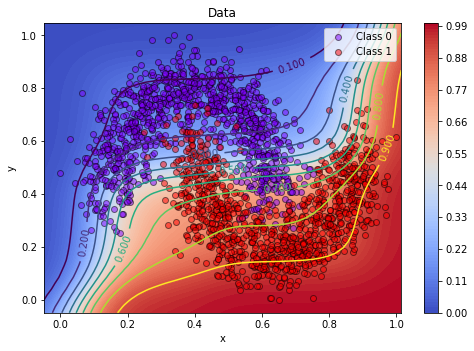

In [18]:
pl.figure(figsize = (8,16/3))    
plot_decision_region(X_test, gen_pred_fun(qmc))
plot_data(X, y)

In [57]:
fm_x = layers.QFeatureMapRFF(2, dim=150, gamma=20, random_state=17)
fm_y = layers.QFeatureMapOneHot(num_classes=2)
qmc = models.QMClassifier(fm_x, fm_y, dim_y=2)
out = qmc(X_train[:2,:])
qmc.compile()
qmc.fit(X_train, y_train, epochs=1)
out = qmc.predict(X_test)
print(out[:10])



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

42/42 [==============================] - 0s 5ms/step
[[0.13299257 0.86700726]
 [0.7121654  0.2878348 ]
 [0.10543711 0.8945628 ]
 [0.13842134 0.8615781 ]
 [0.43276852 0.5672313 ]
 [0.9255293  0.07447084]
 [0.41230687 0.587693  ]
 [0.13965197 0.86034846]
 [0.8564916  0.14350826]
 [0.16789432 0.8321058 ]]


0.9333333333333333
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
0.018314004 0.018314004


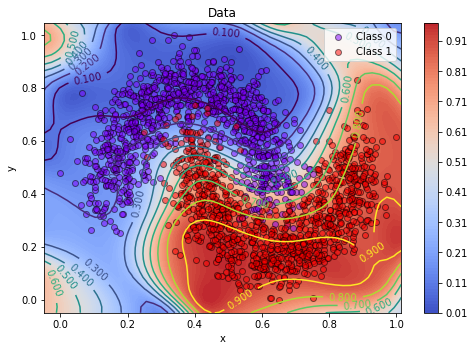

In [58]:
print(accuracy_score(y_test, out[:,1] >= 0.5))
pl.figure(figsize = (8,16/3))    
plot_decision_region(X_test, gen_pred_fun(qmc))
plot_data(X, y)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

0.9333333333333333
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single 

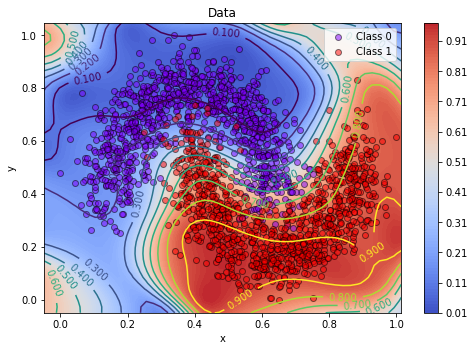

In [63]:
qmc1 = models.QMClassifierSGD(2, 150, 2, gamma=20, random_state=17)
out = qmc1(X_train[:2,:])
qmc1.set_rho(qmc.weights[2])
out = qmc1.predict(X_test)
print(accuracy_score(y_test, out[:,1] >= 0.5))
pl.figure(figsize = (8,16/3))    
plot_decision_region(X_test, gen_pred_fun(qmc1))
plot_data(X, y)

In [65]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
qmc1 = models.QMClassifierSGD(2, 150, 2, gamma=20, random_state=17)
out = qmc1(X_train[:2,:])
qmc1.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
#qmc1.set_rho(qmc.weights[2])
y_train_bin = tf.reshape (tf.keras.backend.one_hot(y_train, 2), (-1,2))
qmc1.fit(X_train, y_train_bin, epochs=1)



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

42/42 [==============================] - 8s 187ms/step - loss: 0.1369


0.9712121212121212
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
0.00057748763 0.00057748763


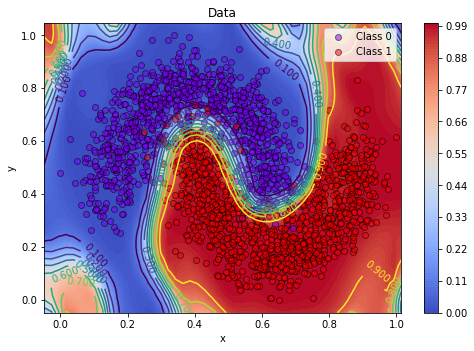

In [62]:
out = qmc1.predict(X_test)
print(accuracy_score(y_test, out[:,1] >= 0.5))
pl.figure(figsize = (8,16/3))    
plot_decision_region(X_test, gen_pred_fun(qmc1))
plot_data(X, y)

In [43]:
tf.linalg.norm(qmc1.weights[1])

<tf.Tensor: shape=(), dtype=float32, numpy=23.559862>

In [47]:
qmc.weights[1].shape

TensorShape([40])